# Raybov et al model fo phytoplankton dynamics with light and nutrient limiting 

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker

In [82]:
class variables:
    n = 100
    
    def __init__(self,alpha,epsilon,u,D,I_in,depth,K_bg,k,H_I,H_N,m, mu_max, D_u, D_d, Z_mix, w, Nbottom):
         
         # alpha
        self.alpha = alpha
        
        # epsilon
        self.epsilon = epsilon
            
            
         # setteling velocity
        self.u = u    # meters per second

         # diffusivity
        self.D = D   # meters per second

         #incident light
        self.I_in = I_in  # umol photons m-2 s-1

         # depth
        self.depth = depth    # meters


         # background turbidity
        self.K_bg = K_bg  #m-1


         # specific light attenuation of phytoplankton
        self.k = k
     

        # H_I half-saturation constant of light-limited growth 
        self.H_I = H_I
        
         # H_N half saturation constatn for nutrient limiting
        self.H_N = H_N


         # m specific loss rate
        self.m = m
        
        # mu_max = maximum growth rate h-1
        self.mu_max = mu_max
        
        
        # D_u = turbulent diffusivity in the Upper Mixed Layer (UML)
        
        self.D_u = D_u
        
        # D_d = turbulent diffusivity in the deep layers
        
        self.D_d = D_d
        
        # Z_mix describes the depth of Upper Mixed Layer (UML)
        
        self.Z_mix = Z_mix
        
        # w  = width of the thermocline ????
        
        self.w = w
        
        self.Nbottom = Nbottom
        
        # size of each depth grid
    def delta_z(self):
        grids = self.depth / self.n
        return grids


In [83]:
                # alpha   epsilon    u     D    I_in   depth   K_bg         k         H_I   H_N    m-loss   mu_max    D_u,   D_d,  Z_mix,    w,  Nbottom
param = variables(10**(-9), 0.5,   0.389, 2.0,  200,   300,   0.045,  6*(10**(-10)),  20,  0.0425,   0.01,   0.04 ,   3.9,   0.5,     50,    0.8,    1000  )

In [84]:
param.__dict__

{'alpha': 1e-09,
 'epsilon': 0.5,
 'u': 0.389,
 'D': 2.0,
 'I_in': 200,
 'depth': 300,
 'K_bg': 0.045,
 'k': 6e-10,
 'H_I': 20,
 'H_N': 0.0425,
 'm': 0.01,
 'mu_max': 0.04,
 'D_u': 3.9,
 'D_d': 0.5,
 'Z_mix': 50,
 'w': 0.8,
 'Nbottom': 1000}

In [85]:
# depth_grid 
def depth_grid(param):
    z = np.arange((0.5 * param.delta_z()),(param.depth - 0.5 * param.delta_z())+ param.delta_z(), param.delta_z())
    return z

z = depth_grid(param)
z

array([  1.5,   4.5,   7.5,  10.5,  13.5,  16.5,  19.5,  22.5,  25.5,
        28.5,  31.5,  34.5,  37.5,  40.5,  43.5,  46.5,  49.5,  52.5,
        55.5,  58.5,  61.5,  64.5,  67.5,  70.5,  73.5,  76.5,  79.5,
        82.5,  85.5,  88.5,  91.5,  94.5,  97.5, 100.5, 103.5, 106.5,
       109.5, 112.5, 115.5, 118.5, 121.5, 124.5, 127.5, 130.5, 133.5,
       136.5, 139.5, 142.5, 145.5, 148.5, 151.5, 154.5, 157.5, 160.5,
       163.5, 166.5, 169.5, 172.5, 175.5, 178.5, 181.5, 184.5, 187.5,
       190.5, 193.5, 196.5, 199.5, 202.5, 205.5, 208.5, 211.5, 214.5,
       217.5, 220.5, 223.5, 226.5, 229.5, 232.5, 235.5, 238.5, 241.5,
       244.5, 247.5, 250.5, 253.5, 256.5, 259.5, 262.5, 265.5, 268.5,
       271.5, 274.5, 277.5, 280.5, 283.5, 286.5, 289.5, 292.5, 295.5,
       298.5])

## D(z) = Changing diffusivity with depth when upper mixed layer present 

In [86]:
# diffusivity grid
def diffusivity_grid(param):
    D_z = np.zeros(param.n)
    
    for i in range(len(D_z)):
        
        D_z[i] = param.D_d + ((param.D_u - param.D_d)/(1+np.e**(z[i]-param.Z_mix/param.w)))
        
    return D_z   

In [87]:
D_z = diffusivity_grid(param)
D_z

array([3.9       , 3.9       , 3.9       , 3.9       , 3.9       ,
       3.9       , 3.9       , 3.9       , 3.9       , 3.9       ,
       3.9       , 3.9       , 3.9       , 3.9       , 3.89999998,
       3.89999962, 3.89999231, 3.89984565, 3.89690243, 3.83884689,
       2.98559917, 0.90528993, 0.52275569, 0.50114019, 0.50005678,
       0.50000283, 0.50000014, 0.50000001, 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5    

In [88]:
D_diff = np.arange(0.05, 2.5, 0.05)
D_diff

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45])

In [89]:
#plt.plot(z,D_z)
#plt.xlabel('Depth (meters)')
#plt.ylabel('Diffusivity m2/s')
#plt.title('Depth vs Diffusivity')

In [90]:
## diffusion of phytoplankton

# advection flux
j_a = np.zeros(param.n + 1)

# diffusion flux
j_d = np.zeros(param.n + 1)

# total flux
j = np.zeros(param.n + 1)


# dp/dt
dp_dt = np.zeros(param.n)



## diffusion of nutrients

j_an = np.zeros(param.n + 1)

j_dn = np.zeros(param.n +1)

j_n = np.zeros(param.n +1)


# dN_dt
dN_dt = np.zeros(param.n)



## Initial conditions
## Planktons p = 1000 cells m-3 , Nutrients N = 5 mmols m-3

In [91]:
y = np.ones(param.n*2)

p = y[0:param.n]
N = y[param.n:param.n*2]


for i in range(len(p)):
    p[i] = p[i] * (10*3)
    N[i] = N[i] * 100


p[0] = 0
N[0] = 0
p[param.n-1]= 0
N[param.n-1] = 0
    
N

array([  0., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
         0.])

## Time steps

In [92]:
t = (0,1000)
t

(0, 1000)

In [93]:
def calc_light(p,param):
    
    p_temp = np.zeros(param.n)
    
    p_temp = np.cumsum(p)*param.delta_z()*param.k
    
    I_zt = param.I_in*(np.e**(- param.K_bg * z - p_temp))
       
    return I_zt


In [94]:
I_zt = calc_light(p,param)
#I_zt

In [95]:
def calc_mu(N,I_zt,param):
    h_n = np.zeros(len(N))
    h_i = np.zeros(len(N))
    mu = np.zeros(len(N))
    
    for i in range(len(N)):
        h_n[i] = N[i] /( param.H_N + N[i])
        h_i[i] = I_zt[i]/(param.H_I + I_zt[i])
        
        mu[i] = param.mu_max * min(h_n[i], h_i[i])
    return mu
    

In [96]:
#calc_mu(N,I_zt,param)
#N /( param.H_N + N)
#I_zt/(param.H_I + I_zt)

In [97]:
def diff_ode(t,y):
    
    dy = np.zeros(param.n*2)
    p = y[0:param.n]
    N = y[param.n:]
    
    # diffusion of phytoplanktons
    for i in range(1,param.n):  
    
        # advection flux
        j_a[i] = param.u * p[i-1]
        j_a[0] = 0
        j_a[param.n] = 0
        
        # diffusionn flux
        j_d[i] = - param.D * (p[i] - p[i-1])/param.delta_z()
        j_d[0] = 0
        j_d[param.n] = 0
    
    # addition of all fluxes
    j  = j_a + j_d
        
                
    for i in range(1,param.n-1):
         
        dp_dt[i] = -(j[i+1] - j[i])/param.delta_z()
        
        
    # nutrient fluxes
    
    for i in range(1,param.n):
        # no advection of nutrients
        j_an[i] = 0 # param.u * N[i-1]
        j_an[0] = 0
        j_an[param.n] = 0
        
        j_dn[i] = - param.D * (N[i] - N[i-1])/param.delta_z()
        j_dn[0] = 0
        j_dn[param.n-1] = - param.D * (param.Nbottom - N[param.n-1])/param.delta_z()
        
        
    j_n = j_an + j_dn
    
    
    for i in range(1,param.n-1):
        
        dN_dt[i] = -(j_n[i+1] - j_n[i])/param.delta_z()
    
    
       
    
    # change in light with time and depth
    I_zt = calc_light(p,param)
    
    
    
    # calculate mu
    mu = calc_mu(N,I_zt,param)
    
    
    # change in nutrients and phytoplankton 
    
    for i in range(1,param.n-1):
     
        dp_dt[i] = (mu[i]*p[i]) - (param.m*p[i]) + dp_dt[i]
        
        dN_dt[i] = -(param.alpha*mu[i]*p[i]) + (param.epsilon*param.alpha*param.m*p[i]) + dN_dt[i] 
        
    dy[0:param.n] = dp_dt
    dy[param.n:] = dN_dt
    
    return dy

In [98]:
#diff_ode(t,y)
soln = solve_ivp(diff_ode,t,y)

In [99]:
omega = soln.y[0:param.n,:]
omega.shape[1]

350

In [100]:
#omega

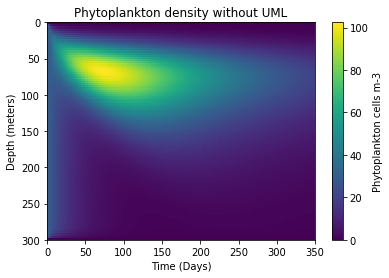

In [101]:
plt.title('Phytoplankton density without UML')
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

scale_y = param.delta_z()


plt.imshow(omega,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Phytoplankton cells m-3')
#plt.imsave('/users/manasi/Documents/dtu/course_content/pgrowth_no_uml.png')

In [102]:
nuts = soln.y[param.n:,:]

In [103]:
#nuts

Text(0.5, 1.0, 'Phytoplankton profile at time step- 100 Day')

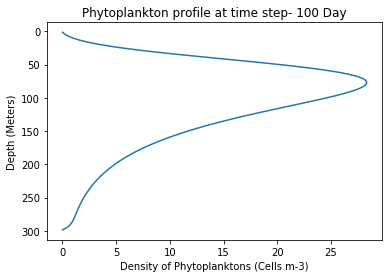

In [104]:
d1 = omega[:,300]
plt.plot(d1,z)
plt.xlabel('Density of Phytoplanktons (Cells m-3)')
plt.ylabel('Depth (Meters)')
plt.gca().invert_yaxis()
plt.title('Phytoplankton profile at time step- 100 Day')

Text(0.5, 1.0, 'Nutrient profile with time and depth')

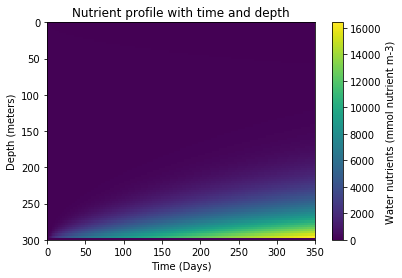

In [105]:
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

plt.imshow(nuts, cmap = 'viridis', aspect = 'auto',extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Water nutrients (mmol nutrient m-3)')
plt.title('Nutrient profile with time and depth')

# Model with presence of upper mixed layer at 50 meters

Text(0.5, 1.0, 'Nutrient profile at time step- 300 Day')

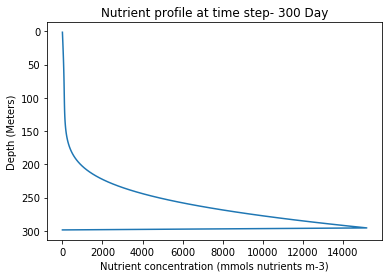

In [106]:
d1 = nuts[:,300]
plt.plot(d1,z)
plt.xlabel('Nutrient concentration (mmols nutrients m-3)')
plt.ylabel('Depth (Meters)')
plt.gca().invert_yaxis()
plt.title('Nutrient profile at time step- 300 Day')

In [2062]:
def diff_ode1(t,y):
    
    dy = np.zeros(param.n*2)
    p = y[0:param.n]
    N = y[param.n:]
    
    # diffusion of phytoplanktons
    for i in range(1,param.n):  
    
        # advection flux
        j_a[i] = param.u * p[i-1]
        j_a[0] = 0
        j_a[param.n] = 0
        
        # diffusionn flux
        j_d[i] = - (D_z[i] * (p[i] - p[i-1]))/param.delta_z()
        j_d[0] = 0
        j_d[param.n] = 0
    
    # addition of all fluxes
    j  = j_a + j_d
        
                
    for i in range(1,param.n-1):
         
        dp_dt[i] = -(j[i+1] - j[i])/param.delta_z()
        
        
    # nutrient fluxes
    
    for i in range(1,param.n):
        # nutrients do not advect
        j_an[i] = 0                 # param.u * N[i-1]
        j_an[0] = 0
        j_an[param.n] = 0
        
        j_dn[i] = - D_z[i] * (N[i] - N[i-1])/param.delta_z()
        j_dn[0] = 0
        j_dn[param.n-1] = - D_z[i] * (param.Nbottom - N[param.n-1]/param.delta_z())
        
    j_n = j_an + j_dn
    
    
    for i in range(1,param.n-1):
        
        dN_dt[i] = -(j_n[i+1] - j_n[i])/param.delta_z()
    
    
    # change in light with time and depth
    I_zt = calc_light(p,param)
    
    
    
    # calculate mu
    mu = calc_mu(N,I_zt,param)
    
    
    # calculate phytoplankton and Nutrients
    
    for i in range(1,param.n-1):
     
        dp_dt[i] = (mu[i]*p[i]) - (param.m*p[i]) + dp_dt[i]
        
        dN_dt[i] = -(param.alpha*mu[i]*p[i]) + (param.epsilon*param.alpha*param.m*p[i]) + dN_dt[i] 
        
    dy[0:param.n] = dp_dt
    dy[param.n:] = dN_dt
    
    return dy

In [2063]:
soln2 = solve_ivp(diff_ode1,t,y)

In [2064]:
omega1 = soln2.y[0:param.n,:]
omega1.shape

(100, 593)

Text(0.5, 1.0, 'Phytoplankton growth with UML 50m')

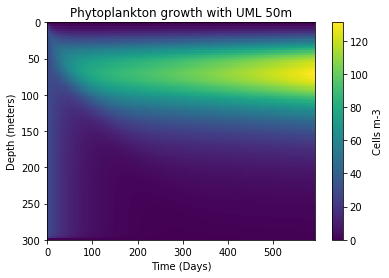

In [2065]:
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

plt.imshow(omega1, cmap = 'viridis', aspect = 'auto',extent=[0,omega1.shape[1],param.depth,0])
cb = plt.colorbar()
cb.set_label('Cells m-3')
plt.title('Phytoplankton growth with UML 50m')

Text(0.5, 1.0, 'Phytoplankton profile with UML at 50m')

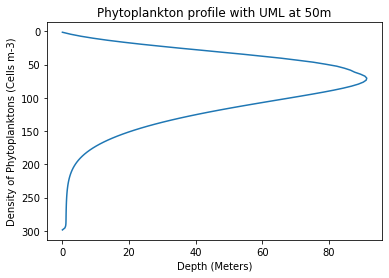

In [2066]:
d2 = omega1[:,200]
plt.plot(d2,z)
plt.xlabel('Depth (Meters)')
plt.ylabel('Density of Phytoplanktons (Cells m-3)')
plt.gca().invert_yaxis()
plt.title('Phytoplankton profile with UML at 50m')

In [2021]:
nuts1 = soln2.y[param.n:,:]
nuts1.shape

(100, 590)

Text(0.5, 1.0, 'Nutrient profile with UML at 50 m')

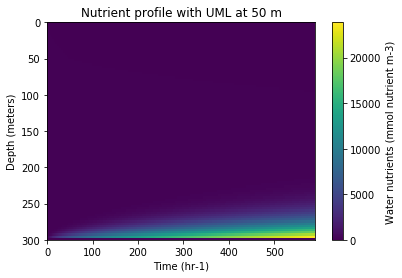

In [2022]:
plt.xlabel('Time (hr-1)')
plt.ylabel('Depth (meters)')

plt.imshow(nuts1, cmap = 'viridis', aspect = 'auto',extent=[0,omega1.shape[1],param.depth,0])
cb = plt.colorbar()
cb.set_label('Water nutrients (mmol nutrient m-3)')
plt.title('Nutrient profile with UML at 50 m')